In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import scipy as sp
import scipy.integrate as integrate
import scipy.constants as constants
from scipy.integrate import odeint
from scipy import linalg
import sympy as sym
from scipy.optimize import fmin
import time
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (15.0, 6.0)
plt.rcParams['font.size'] = 16
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for i in range(6):
    print("Starte mit Aufgabe %i nach spätestens %i Minuten!"% (i+1, 120/6*i))

Starte mit Aufgabe 1 nach spätestens 0 Minuten!
Starte mit Aufgabe 2 nach spätestens 20 Minuten!
Starte mit Aufgabe 3 nach spätestens 40 Minuten!
Starte mit Aufgabe 4 nach spätestens 60 Minuten!
Starte mit Aufgabe 5 nach spätestens 80 Minuten!
Starte mit Aufgabe 6 nach spätestens 100 Minuten!


## 1.1 kleinste auflösbare Zahl 

In [5]:
x1 = 1
x2 = 2
kleinste = 1
i = 0
while 1 + x1 != 1 + x2:
    kleinste = x1
    x1 = x2
    x2 /= 2
    i += 1
i, kleinste

(55, 2.220446049250313e-16)

## 1.2 differezialmethoden

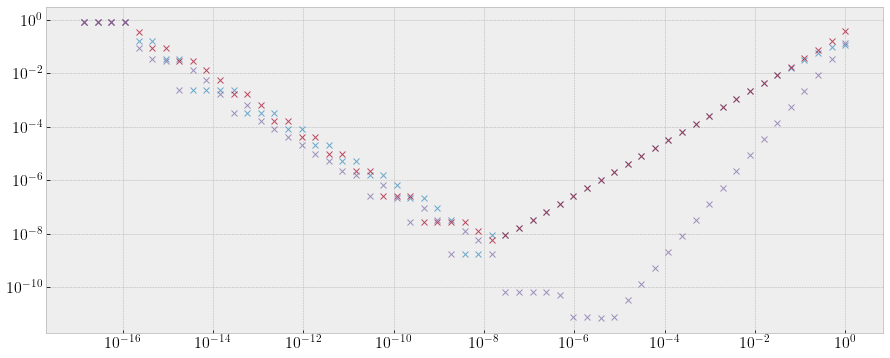

In [6]:
forw = lambda fun, x, h: (fun(x+h)-f(x))/h
backw = lambda fun, x, h: (-fun(x-h)+f(x))/h
centra = lambda fun, x, h: (fun(x+h)-f(x-h))/(2*h)
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)
x = 1
h = np.logspace(1, -20, 300)
h = np.array([2**-n for n in range(57)])
plt.plot(h, abs(df(x)- forw(f,x,h)),"x", alpha = 0.7)
plt.plot(h, abs(df(x)- backw(f,x,h)),"x", alpha = 0.7)
plt.plot(h, abs(df(x)- centra(f,x,h)),"x", alpha = 0.7)
plt.loglog()
plt.show()

## 1.3 Potentialgraph

149999
1.9999949999749997


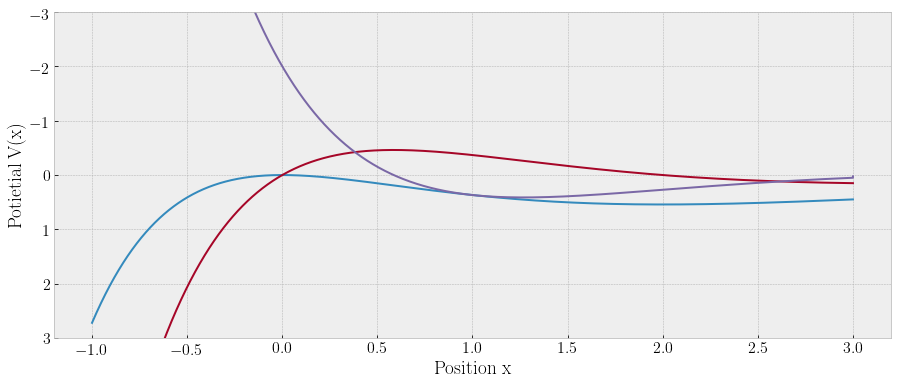

In [7]:
#%%pep8
V = lambda x: x**2 * np.exp(-x)
x = np.linspace(-3, 3, 2000)
x = np.linspace(-1, 3, 200000)
m = 1
#Φ = m * np.diff(V(x))
Φ = lambda x: -m * np.gradient(V(x),x)
dΦ = lambda x: np.gradient(Φ(x),x)
gleichgewichtspunkt = (abs(0-Φ(x))).argmin()
print(gleichgewichtspunkt)
print(x[gleichgewichtspunkt])
#print(Φ(x[gleichgewichtspunkt-1]))
#print(Φ(x[gleichgewichtspunkt+1]))
plt.plot(x, V(x)), plt.xlabel("Position x"), plt.ylabel("Potietial V(x)")
# plt.show()
plt.plot(x, Φ(x))
# plt.show()
plt.plot(x, dΦ(x)), plt.ylim(3,-3)
plt.show()

In [8]:
?np.minimize
#fmin(func = Φf, x0 = 0.1)

Object `np.minimize` not found.


In [9]:
x = sym.symbols("x")
V = x**2 * sym.exp(-x)
dV = sym.diff(V)
fmin(lambda y: abs(0-float(dV.subs({x:y}))), -1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 18
         Function evaluations: 36


array([8.8817842e-16])

In [10]:
dV, dV.simplify()

(-x**2*exp(-x) + 2*x*exp(-x), x*(-x + 2)*exp(-x))

In [11]:
x = np.linspace(-1,1,200)
V = lambda x: x**2 * np.exp(-x)
dV = lambda x: np.gradient(V(x),x)
Minimuselement = (abs(0-V(x))).argmin()
Minimuselement

100

In [12]:
def meantime(f,N):
    t = 0
    for i in range(1,N):
        tstart = time.clock()
        f()
        tend = time.clock()
        t += (tend-tstart)
    return t/N    

## 3.1 Hermite polinome

In [13]:
def H(x, n):
    if n <= 0:
        return 1
    return 2 * x * H(x, n - 1) - 2 * (n - 1) * H(x, n - 2)

In [14]:
Ψ = lambda x, n: H(x, n) * np.exp(- x**2 / 2) / np.sqrt(np.sqrt(np.pi) * 2**n * np.math.factorial(n))

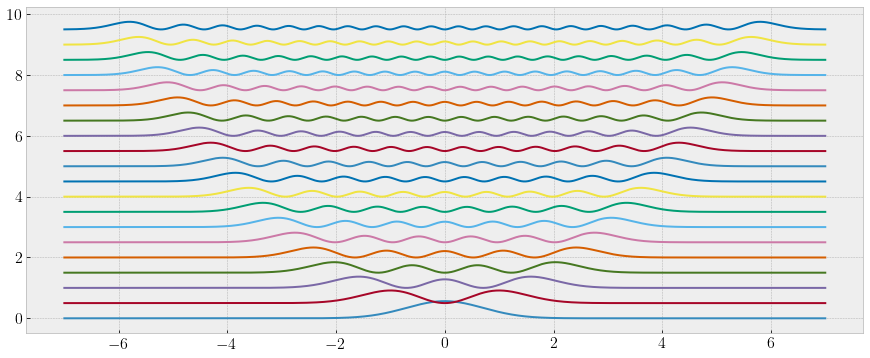

In [15]:
x = np.linspace(-7,7,1000)
for n in range(20):
    plt.plot(x, abs(Ψ(x,n)*Ψ(x,n)) +n/2)
plt.show()

## 3.2 Specific heats

In [16]:
Z = lambda T, n: np.sum([(2 * J + 1)*np.exp(-J * (J + 1) * Θ/T) for J in range(n)])
I = 1
Θ = constants.hbar**2/(2*I*constants.Boltzmann)

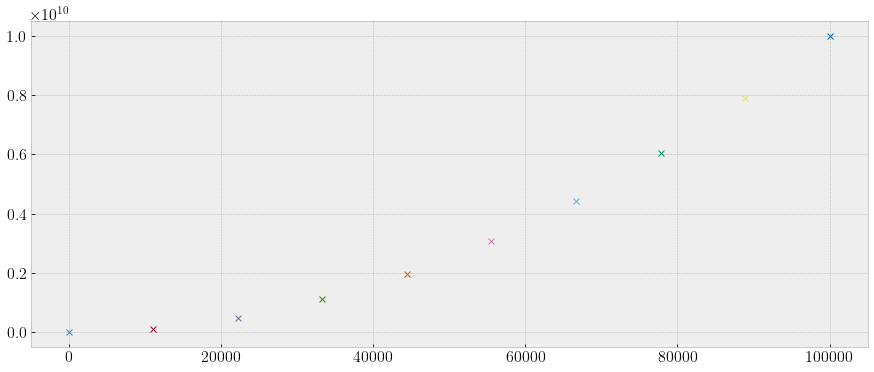

In [17]:
x = np.linspace(1e1,1e5,10)
for xx in x:
    plt.plot(int(xx), Z(10,int(xx)),"x")
    #print(int(xx), Z(10,int(xx)))
plt.show()

## 3.3 Julia sets

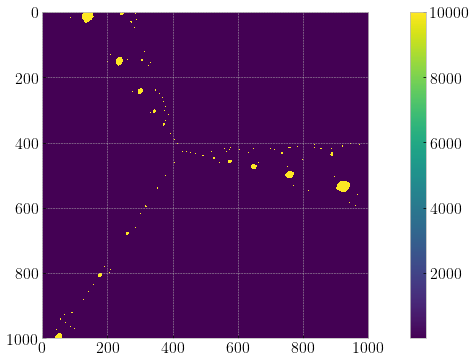

In [18]:

p = lambda z: z*z*z + (a - 1)*z - a
dp= lambda z: -1 + a + 3 *z**2
z = lambda x, y: x + 1j * y

def newtons_method(f, df, x0, e):
    i = 0
    while abs(0-f(x0)) > e:
        x0 = x0 - f(x0)/df(x0)
        i += 1
        if i > 1e4:
            break
    return i
a = 0
a = 0.32 + 1j * 1.64
x = np.linspace(-30,40,1000)
y = np.linspace(-30,40,1000)
iteration_matrix = np.zeros([len(x), len(y)])
for n_x, x_i in enumerate(x):
    for n_y, y_i in enumerate(y):
        iteration_matrix[n_x,n_y] = newtons_method(p, dp, z(x_i,y_i), 1e-3)
plt.imshow(iteration_matrix)
plt.colorbar()
plt.show()

## 3.4 Vibrating beams

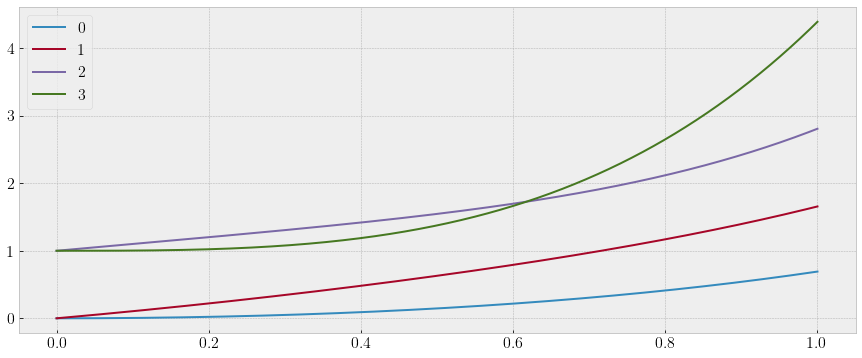

In [19]:
def beam(y,t):
    A, a1, a2, a3 = y
    dydt = [a1, a2, a3, k**4*A]
    return dydt

k = 2
y0 = [0, 0, 1, 1]
t = np.linspace(0,1,1000)
los = odeint(beam, y0, t)

for i in range(4):
    plt.plot(t, los[:,i], label = "%i"%i)
plt.legend()
plt.show()

In [20]:
A, a, k, x, b, c, d = sym.symbols("A a k x b c d")
A = a * sym.cos(k*x) + b*sym.sin(k*x) + c *sym.cosh(k*x) + d * sym.sinh(k*x)
sym.diff(sym.diff(sym.diff(sym.diff(A,x),x),x),x)
sym.diff(sym.diff(sym.diff(sym.diff(A,x),x),x),x)

a*k**4*cos(k*x) + b*k**4*sin(k*x) + c*k**4*cosh(k*x) + d*k**4*sinh(k*x)

## 4.1. Prandtl-von Karman law

In [21]:
null = lambda f, Re: A * np.log(Re * np.sqrt(f)) + B - 1/np.sqrt(f)
A, B = 0.88, -0.81

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


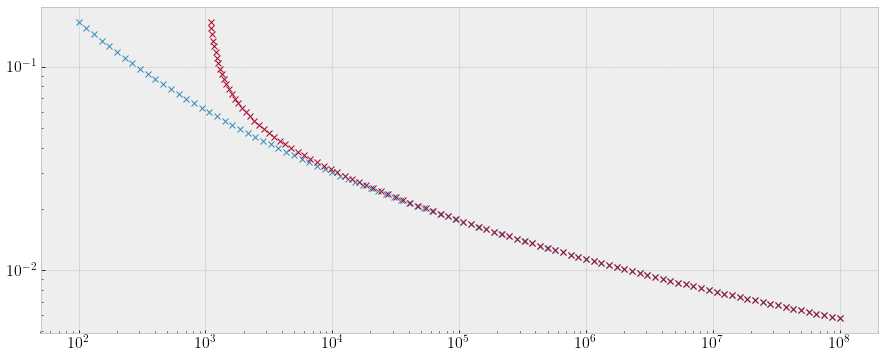

In [22]:
for c, f in enumerate([0.0001, 100000]):
    for Re in np.logspace(2 , 8, 100):
        f_i = fmin(lambda x, Re:abs(null(x, Re)), 0, args=(Re,), disp=0)
        plt.plot(Re+ c*1000, f_i, "x", c="C%i"%c)
plt.loglog()
plt.show()

## 4.2. Lagrange points

In [23]:
H = lambda x, y:( 100000-  (p_x**2 + p_y**2)/2 
                    - x*p_y + y*p_x 
                    - m_1/np.sqrt((x+m_2)**2+y**2)
                    - m_2/np.sqrt((x-m_1)**2+y**2)   )
def H(x, y):
    p_x = -y
    p_y = x
    return (   (p_x**2 + p_y**2)/2 
                    - x*p_y + y*p_x 
                    - m_1/np.sqrt((x+m_2)**2+y**2)
                    - m_2/np.sqrt((x-m_1)**2+y**2)   )



(-20, 20)

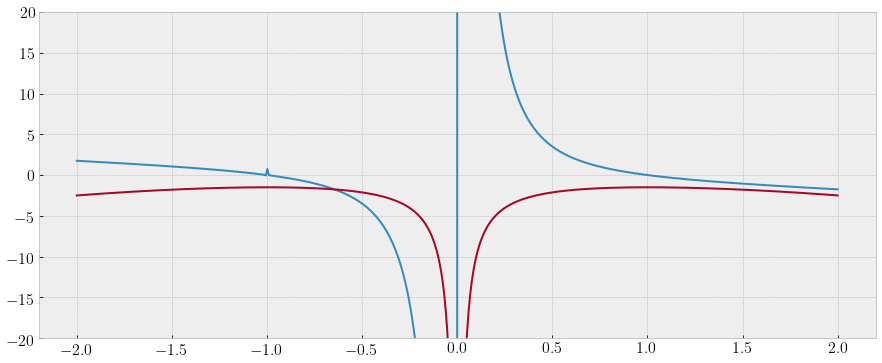

In [24]:
def x_equation(x,y,m1,m2):
    xeq = m1*(x+m2)/pow(((x+m2)**2+y**2),1.5) + m2*(x-m1)/pow(((x-m1)**2+y**2),1.5)-x
    return xeq
x = np.linspace(-2,2,500)
plt.plot(x,x_equation(x,0, m_1, m_2))
plt.plot(x,H(x,0))
plt.ylim(-20,20)

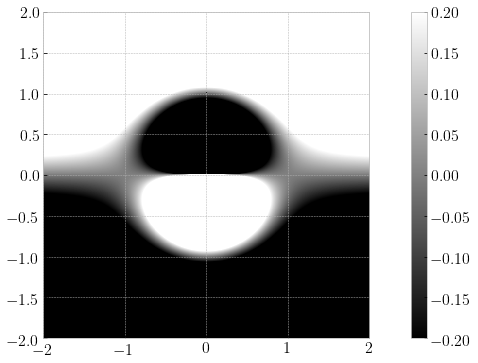

In [25]:
p_x = 0
p_y = 0
m_1 = 3e-6
m_2 = 1-m_1

N_x, N_y = 1000, 1000
x_min, x_max = -2, 2
y_min, y_max = -2, 2
x, y = np.linspace(x_min, x_max, N_x), np.linspace(y_min, y_max, N_y)
X, Y = np.meshgrid(x, y, indexing='ij')
H_grid = H(X,Y)
H_grid = x_equation(X,Y, m_1, m_2)
plt.imshow(H_grid,  extent=(x_min, x_max, y_min, y_max), 
           cmap=cm.gray, vmin=-.2, vmax=.2)
plt.colorbar()

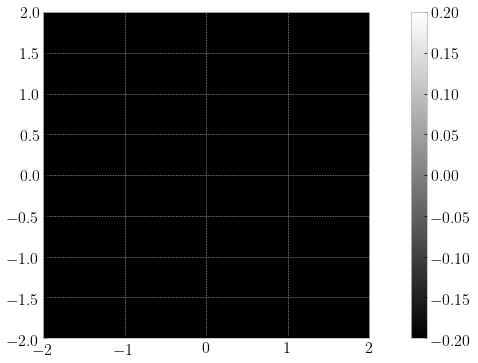

In [26]:
def xy_equation(x,m1,m2):
    xeq=[0,0] 
    xeq[0] = m1*(x[0]+m2)/pow(((x[0]+m2)**2+x[1]**2),1.5) + m2*(x[0]-m1)/pow(((x[0]-m1)**2+x[1]**2),1.5)-x[0]
    xeq[1] = m1*x[1]/pow((x[0]+m2)**2+x[1]**2,1.5) + m2*x[1]/pow((x[0]-m1)**2+x[1]**2,1.5) - x[1]
    return xeq
m_1 = 3e-6
m_2 = 1-m_1

N_x, N_y = 1000, 1000
x_min, x_max = -2, 2
y_min, y_max = -2, 2
x, y = np.linspace(x_min, x_max, N_x), np.linspace(y_min, y_max, N_y)
X, Y = np.meshgrid(x, y, indexing='ij')
H_grid = H(X,Y)
plt.imshow(H_grid, extent=(x_min, x_max, y_min, y_max), 
           cmap=cm.gray, vmin=-.2, vmax=.2)
plt.colorbar()

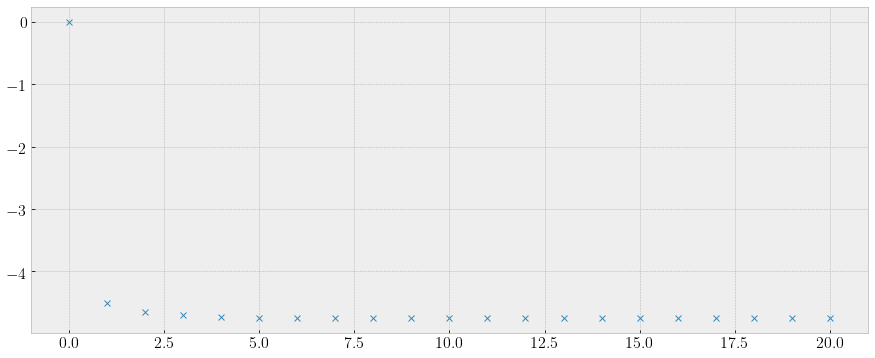

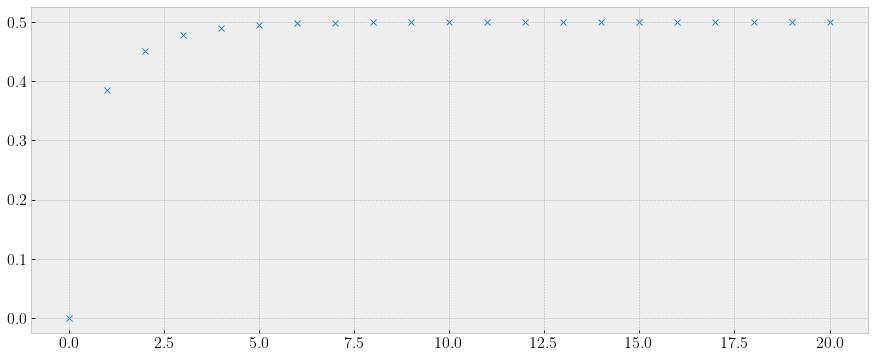

(array([-4.74989163]), array([0.49991845]), array([[ 0.        ,  0.        ],
        [-4.5       ,  0.3854375 ],
        [-4.64853516,  0.4507812 ],
        [-4.70318041,  0.47684199],
        [-4.72735081,  0.48876304],
        [-4.73889219,  0.49449073],
        [-4.74450343,  0.49729156],
        [-4.74728341,  0.49865134],
        [-4.74867422,  0.49933309],
        [-4.74931186,  0.49962567],
        [-4.74960173,  0.49982083],
        [-4.74983365,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845],
        [-4.74989163,  0.49991845]]))

In [27]:
def fmin_2d(fun, x1, x2, n_max):
    x1_x2_liste = np.zeros([n_max + 1,2])
    x1_x2_liste[0]= ([x1,x2])
    for n in range(n_max):
        x1 = fmin(lambda x1: fun(x1, x2), x1, disp=0)
        x2 = fmin(lambda x2: fun(x1, x2), x2, disp=0)
        x1_x2_liste[n+1]= ([x1,x2])
    
    plt.plot(x1_x2_liste[:,0], "x")
    plt.show()
    plt.plot(x1_x2_liste[:,1], "x")
    plt.show()
    return x1, x2, x1_x2_liste
func = lambda x1, x2: (x1 + 5 + x2**2)**2 + abs(x2 - 10 + x1)
fmin_2d(func, 0,0,20)


## 4.3. Residuals

In [28]:
A =np.array([
[1.2969, 0.8648],
[0.2161, 0.1441]])
#x = 0.9911 −0.4870
b = np.array([0.8642,0.1440])

In [29]:
np.linalg.lstsq(A, b)[0]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([ 2., -2.])

## 7.2. Finite difference representation for a 1-d Schrödinger equation

In [30]:
diff = lambda fun, x,  h: (fun(x + h) - 2 * fun(x) + fun(x - h)) / h**2

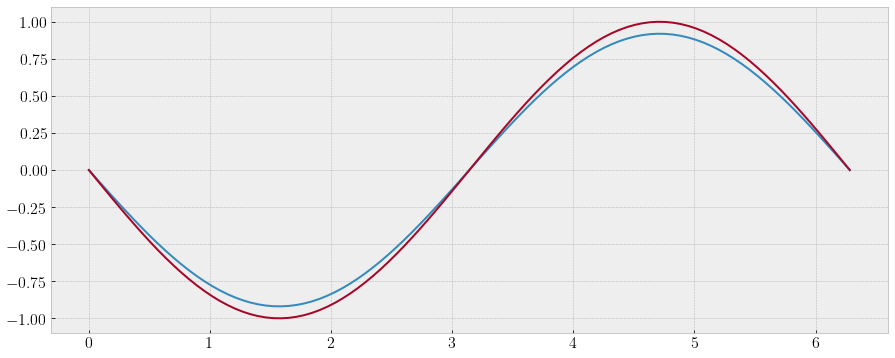

In [31]:
x = np.linspace(0,2*np.pi, 100)
plt.plot(x, diff(np.sin, x, 1e0))
plt.plot(x, -np.sin(x))
plt.show()

(-1, 1)

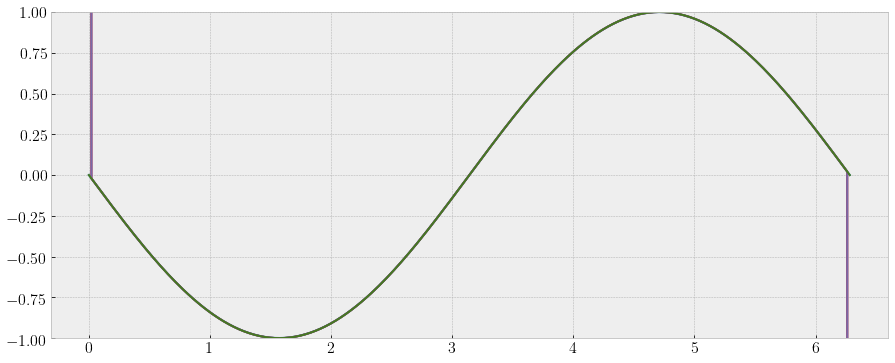

In [32]:
def dif2_matrix(x, dx):
    dif_now = np.diag(np.ones(len(x))) * -2
     
    # Left elements of diagonal are 1.
    dif_pre_ones = np.ones(len(x)-1) # 1 vector.
    dif_pre = np.diag(dif_pre_ones, k=-1) # Diagonal matrix shiftedto left.
 
    # Right elements of diagonal are 1.
    dif_post_ones = np.ones(len(x)-1) # 1 vector.
    dif_post = np.diag(dif_post_ones, k=1) # Diagonal matrix shiftedto right.
     
    dif  =  dif_now + dif_pre + dif_post
    dif /= dx**2
    return dif

x = np.linspace(0,2*np.pi, 300)
dx = x[1] - x[0]
d2_m = dif2_matrix(x, dx)
plt.plot(x, diff(np.sin, x, 1e-1))
plt.plot(x, np.dot(d2_m, np.sin(x)))
plt.plot(x, d2_m.dot(np.sin(x)))
plt.plot(x, -np.sin(x))
plt.ylim(-1,1)
#plt.show()


## 8.2. Vibrating beams

0.2850518346907677
2.165241566534278
8.31600389315755
22.70219473421493


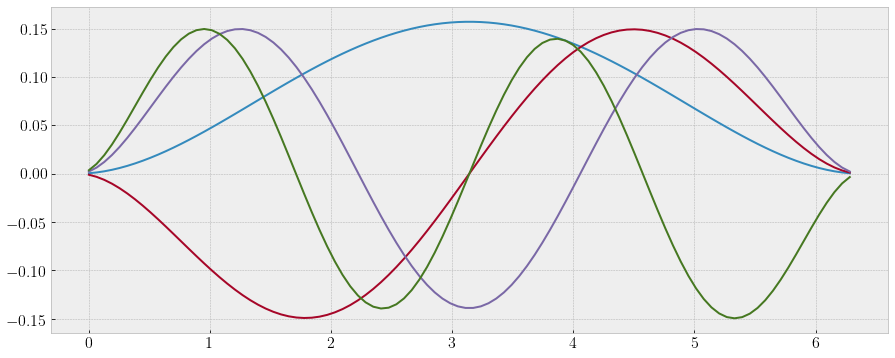

In [33]:
# Differenzialmatrix für d2x: Central Differenz
def dif4_matrix(x, dx):
    dif_now = np.diag(np.ones(len(x))) * 6
    ones = np.ones(len(x)-1)
    dif_2 = np.diag(ones, k=-1) * - 4     
    dif_4 = np.diag(ones, k=1) * - 4     
    ones = np.ones(len(x)-2)
    dif_1 = np.diag(ones, k=-2)
    dif_5 = np.diag(ones, k=2)     
    dif  =  dif_now+dif_1+dif_2+dif_4+dif_5
    dif /= dx**4
    return dif

def A(kl, y): # from Ex.3.4, to compare results
    # y = x/l => kx = kly
    return (sin(kl) - sinh(kl)) * (cos(kl*y) - cosh(kl*y)) - \
           (cos(kl) - cosh(kl)) * (sin(kl*y) - sinh(kl*y))


x = np.linspace(0, 2*np.pi, 100)
dif4 = dif4_matrix(x, x[1]-x[0])

ew, ev = linalg.eigh(dif4)
Nev = 4
for i in range(Nev):
    print(ew[i])
    plt.plot(x,ev[:,i])#+ew[i])    
#plt.plot(x, V(x))

<IPython.core.display.Javascript object>


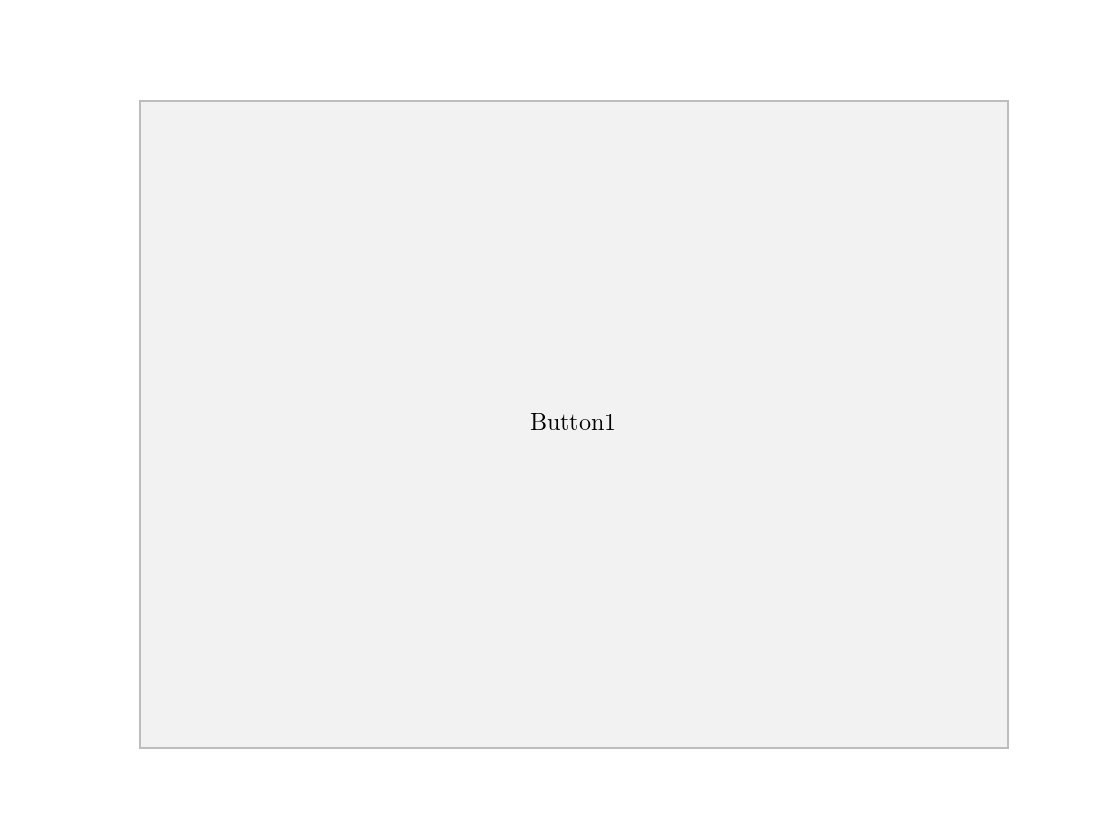

In [34]:
%matplotlib notebook
from matplotlib.widgets import Button
import matplotlib.pyplot as plt
def callback(event):
    plt.text(event.xdata, event.ydata, 'clicked')

f,a = plt.subplots(1)
b1 = Button(a,'Button1')
b1.on_clicked(callback)
plt.show()